# Αναγνώριση Προτύπων
## Πρώτη εργασία , Κώστας Μαυρογιαννάκης 9789

## Ξεκινάμε κάνοντας import τις βιβλιοθήκες που θα χρειαστούμε

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

## Εισάγουμε τα δεδομένα της εκφώνησης

In [2]:
step=0.01                     # ορίζω το βήμα της arange
x1,x2=np.meshgrid(np.arange(0,7,step),np.arange(0,7,step)) # οι τιμες δεν εκτεινονται περα απο το 7,7 οποτε κανω meshgrid
m1=np.array([0.4,0.8])                                     # απο το 0 μεχρι το 7 με βημα 0.01 για να φτιαξω τους αξονες x,y
m2=np.array([1.5,2.7])        # περναω τα δεδομενα
pw1=0.95                      # 
pw2=0.05                      # περναω τα δεδομενα
S=np.array([[1.5,0],[0,0.8]]) #

## Υλοποιούμε την κανονική κατανομή
### Βρήκα έτοιμη συνάρτηση για να το κάνει αυτό , την multivariate_normal , δίνοντας τα μ και σ και μετά με την συνάρτηση .pdf() έχουμε την κανονική κατανομή.

In [3]:
rv1=stats.multivariate_normal(m1,S)   # εκτελω την εντολη
rv2=stats.multivariate_normal(m2,S)   # για κανονικη κατανομη
pos=np.dstack((x1,x2))        # κανω τα x1,x2 ζευγαρια
pxw1=rv1.pdf(pos)             # για να υλοποιηθει η .pdf()
pxw2=rv2.pdf(pos)

## Κάνουμε plot για να οπτικοποιήσουμε τα αποτελέσματα

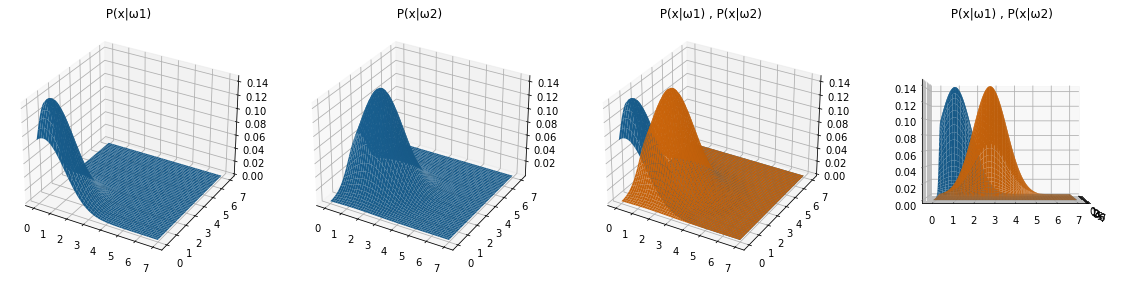

In [10]:
fig = plt.figure(figsize=(20,20))            # οριζουμε το figure

ax = fig.add_subplot(1,4,1,projection ='3d') # οριζουμε το subplot
ax.plot_surface(x1,x2, pxw1  )               # κανουμε plot surface
ax.set_title(' P(x|ω1) ')                    # βαζουμε τιτλο
                                                # παρακατω δεν σχολιαζω τις εντολες για τα plot
ax = fig.add_subplot(1,4,2,projection ='3d')    # καθως ειναι ομοια με τις παραπανω και 
ax.plot_surface(x1,x2, pxw2  )                  # εχω βαλει τιτλους στην καθε γραφικη παρασταση
ax.set_title(' P(x|ω2) ')                       # για να ξερουμε ποιο μεγεθος εμφανιζεται στο plot

ax = fig.add_subplot(1,4,3,projection ='3d')
ax.plot_surface(x1,x2, pxw1 )
ax.plot_surface(x1,x2, pxw2 )
ax.set_title(' P(x|ω1) , Ρ(x|ω2) ')

ax = fig.add_subplot(1,4,4,projection ='3d')
ax.plot_surface(x1,x2, pxw1 )
ax.plot_surface(x1,x2, pxw2 )
ax.set_title(' P(x|ω1) , Ρ(x|ω2) ')
ax.view_init(0,0)                             # αρχικοποιω γωνια προβολης 0,0

plt.show()

### Εφόσον διαφέρει μόνο η μέση τιμή, οι γραφικές παραστάσεις είναι πανομοιότυπες αλλά μετατοπισμένες.
### Αν είχαμε πάρει διάστημα με αρνητικές τιμές θα φαινόταν καλύτερα αφού δεν θα ήταν κομμένη η p(x|ω1)

## Βρίσκουμε το p(x) από τον τύπο και το κάνουμε plot

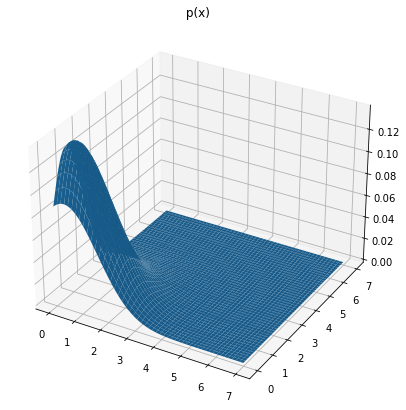

In [11]:
px= (pxw2*pw2) +  (pxw1*pw1)     # εφαρμό΄ζω τον τύπο p(x)=Σ p(x|ωi)*p(ωi)

fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection ='3d')
ax.plot_surface(x1,x2,px )
plt.title(' p(x) ')

plt.show()

## Βλέπουμε πως η ολική κατανομή πιθανότητας προσεγγίζει την p(x|ω1) , αφού p(ω1)>>p(ω2) και η ω1 δίνει παραπάνω βάρος.

## Έχοντας βρει τα p(x) και p(x|ωi) , υπολογίζουμε τα p(ωi|x) και τα κάνουμε plot

In [12]:
pw1x=pxw1*pw1/px       # εφαρμοζω τον τυπο p(ωi|x)=p(x|ωi)*p(ωi)/p(x)
pw2x=pxw2*pw2/px       # ομοια

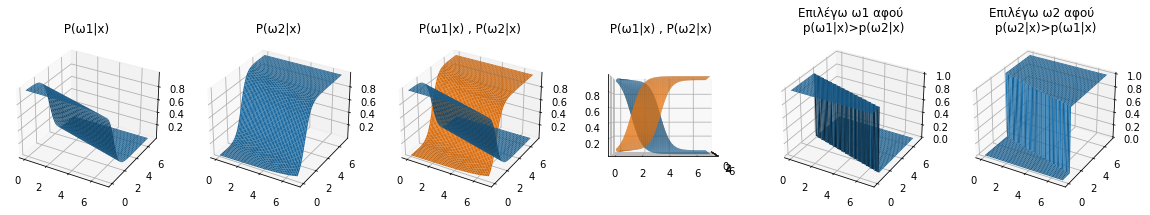

In [13]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,6,1,projection ='3d')
ax.plot_surface(x1,x2, pw1x  )
ax.set_title(' P(ω1|x) ')

ax = fig.add_subplot(1,6,2,projection ='3d')
ax.plot_surface(x1,x2, pw2x  )
ax.set_title(' P(ω2|x) ')

ax = fig.add_subplot(1,6,3,projection ='3d')
ax.plot_surface(x1,x2, pw1x  )
ax.plot_surface(x1,x2, pw2x  )
ax.set_title(' P(ω1|x) , P(ω2|x) ')

ax = fig.add_subplot(1,6,4,projection ='3d')
ax.plot_surface(x1,x2, pw1x  )
ax.plot_surface(x1,x2, pw2x  )
ax.set_title(' P(ω1|x) , P(ω2|x) ')
ax.view_init(0,0)

ax= fig.add_subplot(1,6,5,projection='3d')
ax.plot_surface(x1,x2, pw1x>pw2x )
ax.set_title('Επιλέγω ω1 αφού \n p(ω1|x)>p(ω2|x)')

ax= fig.add_subplot(1,6,6,projection='3d')
ax.plot_surface(x1,x2, pw1x<pw2x )
ax.set_title('Επιλέγω ω2 αφού \n p(ω2|x)>p(ω1|x)')

plt.show()

## Εφόσον οι πίνακες συμμεταβλητότητας είναι ίδιοι, οι επιφάνειες διαχωρίζονται από μία ευθεία

## Βρίσκουμε τα σφάλματα από τον τύπο και τα υπολογίζουμε

In [14]:
w1error= (pw1x>pw2x) *pw2x*px*(step**2)  # Ο όρος στην παρένθεση είναι η επιφάνεια απόφασης ω1 , οπότε από τον τύπο 
w2error= (pw2x>pw1x) *pw1x*px*(step**2)  # πολ/ζω με p(ω2|x) * p(x) * dx  , όμοια για το σφάλμα όταν επιλέγω ω2
error= w1error + w2error                 # Το συνολικό σφάλμα είναι το άθροισμα των 2 επιμέρους

print('Η πιθανότητα σφάλματος αν πω σε υγιή ότι έχει καρκίνο είναι: ',
      round( w1error.sum(), 4)*100, '%.' )                                 # κραταω μεχρι 4 δεκ. ψηφια
print('Η πιθανότητα σφάλματος αν πω σε άτομο με καρκίνο ότι είναι υγιής: ',
      round( w2error.sum(), 4)*100,'%.' )                                  # και τα φερνω σε μορφη 
print('Η συνολική πιθανότητα σφάλματος είναι : ',
      round( error.sum(), 4)*100, '%.' )                                   # ποσοστου

# κανουμε .sum() αφου εχουμε διακριτες τιμες και δεν οριζεται σε διακριτες τιμες ολοκληρωμα. Αθροιζει ολα τα στοιχεια ανα γραμμη
# και στηλη και προκυπτει το αποτελεσμα

Η πιθανότητα σφάλματος αν πω σε υγιή ότι έχει καρκίνο είναι:  2.3 %.
Η πιθανότητα σφάλματος αν πω σε άτομο με καρκίνο ότι είναι υγιής:  0.67 %.
Η συνολική πιθανότητα σφάλματος είναι :  2.97 %.


## Παρατηρούμε ότι η συνολική πιθανότητα σφάλματος είναι μικρή και ότι τα επιμέρους σφάλματα έχουν αρκετή διαφορά μεταξύ τους. Στο συγκεκριμένο παράδειγμα θα θέλαμε ιδανικά μικρή πιθανότητα σφάλματος όταν επιλέγουμε την κλάση ω1 , διότι αν πούμε σε άτομο με καρκίνο ότι είναι υγιής μπορεί να χάσει κρίσιμο χρονικό διάστημα από την διάγνωση και την θεραπεία του. Η υλοποίησή μας το πετυχαίνει αυτό. Από την άλλη , η πιθανότητα σφάλματος όταν επιλέγουμε ω2 σημαίνει ότι ο ασθενής ενδεχομένως να ταραχθεί, αλλά αποτελεσματικά δεν κινδυνεύει από κάτι.

## Για το δεύτερο ερώτημα αρκεί να υπολογίσω ξανά το rv2

In [15]:
rv22=stats.multivariate_normal(m2,(S/4))  # Σ2=Σ/4
pxw22=rv22.pdf(pos)        # Εκτελω την εντολη .pdf()
px2= pxw1*pw1 + pxw22*pw2  # Το p(x|ω1) δεν αλλάζει , οπως και p(ω1) , p(ω2)
pw1x2=pxw1*pw1/px2         # Ολα υπολογιζονται οπως και πριν
pw2x2=pxw22*pw2/px2        # Στα καινουρια μεγεθη εβαλα καταληξη '2' για να μπορω να τα διαχωριζω


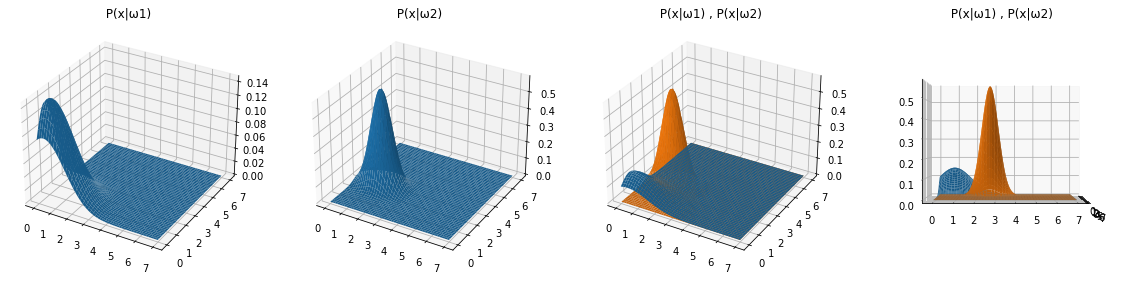

In [16]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,4,1,projection ='3d')
ax.plot_surface(x1,x2, pxw1  )
ax.set_title(' P(x|ω1) ')

ax = fig.add_subplot(1,4,2,projection ='3d')
ax.plot_surface(x1,x2, pxw22  )
ax.set_title(' P(x|ω2) ')

ax = fig.add_subplot(1,4,3,projection ='3d')
ax.plot_surface(x1,x2, pxw1 )
ax.plot_surface(x1,x2, pxw22 )
ax.set_title(' P(x|ω1) , Ρ(x|ω2) ')

ax = fig.add_subplot(1,4,4,projection ='3d')
ax.plot_surface(x1,x2, pxw1 )
ax.plot_surface(x1,x2, pxw22 )
ax.set_title(' P(x|ω1) , Ρ(x|ω2) ')
ax.view_init(0,0)

plt.show()

## Βλέπουμε πως με πίνακα συμμεταβλητότητας με μικρότερα στοιχεία το p(x|ω2) παίρνει μεγαλύτερες τιμές. 

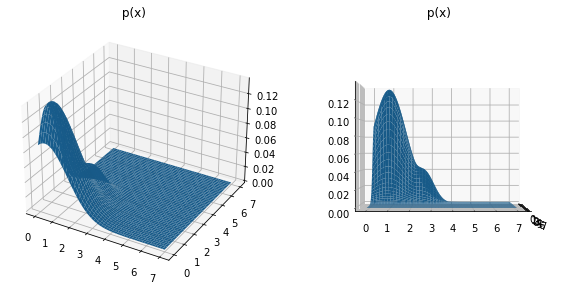

In [17]:
fig = plt.figure(figsize=(10,10))

ax= fig.add_subplot(1,2,1,projection ='3d')
ax.plot_surface(x1,x2,px2 )
plt.title(' p(x) ')

ax= fig.add_subplot(1,2,2,projection ='3d')
ax.plot_surface(x1,x2,px2 )
plt.title(' p(x) ')
ax.view_init(0,0)

plt.show()

## Πλέον φαίνεται η συμβολή του όρου p(x|ω2) , παρότι  p(ω1)>>p(ω2) , αφού έχει μεγαλύτερες τιμές ( το μέγιστό του είναι ~4 φορές το μέγιστο του p(x|ω1) )

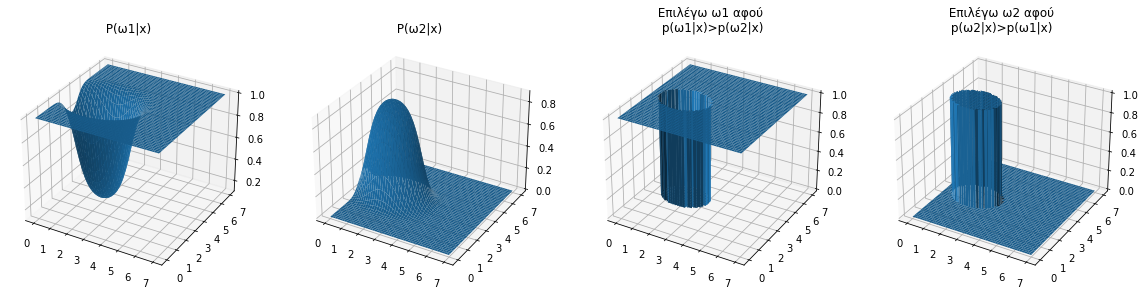

In [19]:
fig = plt.figure(figsize=(20,20))

ax = fig.add_subplot(1,4,1,projection ='3d')
ax.plot_surface(x1,x2, pw1x2  )
ax.set_title(' P(ω1|x) ')

ax = fig.add_subplot(1,4,2,projection ='3d')
ax.plot_surface(x1,x2, pw2x2  )
ax.set_title(' P(ω2|x) ')

ax = fig.add_subplot(1,4,3,projection ='3d')
ax.plot_surface(x1,x2, (pw1x2>pw2x2)  )
ax.set_title(' Επιλέγω ω1 αφού \n p(ω1|x)>p(ω2|x)')

ax = fig.add_subplot(1,4,4,projection ='3d')
ax.plot_surface(x1,x2, (pw1x2<pw2x2)  )
ax.set_title(' Επιλέγω ω2 αφού \n p(ω2|x)>p(ω1|x) ')

plt.show()

## Εδώ παρατηρούμε ότι η επιφάνεια που επιλέγω ω2 έχει γίνει μία πεπερασμένη έλλειψη , σε αντίθεση με πριν που ήταν ένα διάστημα που εκτεινόταν στο άπειρο. Στη επιφάνεια που μένει επιλέγω ω1

In [20]:
w1error2= (pw1x2>pw2x2) *pw2x2*px2*(step**2)  # ομοια με πριν
w2error2= (pw2x2>pw1x2) *pw1x2*px2*(step**2)  # υπολογιζω τα επιμερους σφαλματα
error2= w1error2 + w2error2                   # και τα αθροιζω για να βρω το συνολικο

print('Η πιθανότητα σφάλματος αν πω σε υγιή ότι έχει καρκίνο είναι: ',
      round( w1error2.sum(), 4)*100, '%.' )                                 # κραταω μεχρι 4 δεκ. ψηφια
print('Η πιθανότητα σφάλματος αν πω σε άτομο με καρκίνο ότι είναι υγιής: ',
      round( w2error2.sum(), 4)*100,'%.' )                                  # και τα φερνω σε μορφη 
print('Η συνολική πιθανότητα σφάλματος είναι : ',
      round( error2.sum(), 4)*100, '%.' )                                   # ποσοστου

Η πιθανότητα σφάλματος αν πω σε υγιή ότι έχει καρκίνο είναι:  1.53 %.
Η πιθανότητα σφάλματος αν πω σε άτομο με καρκίνο ότι είναι υγιής:  1.34 %.
Η συνολική πιθανότητα σφάλματος είναι :  2.87 %.


## Το συνολικό σφάλμα έχει μία μικρή μεταβολή , παρατηρούμε όμως ότι τα επιμέρους σφάλματα έχουν πλέον μικρή απόκλιση μεταξύ τους. Σε αυτό το ερώτημα φαίνεται να έχουμε κάνει πιο σωστή ταξινόμηση , καθώς επιλέγω την κλάση ω2 πιο σπάνια , παρόλα αυτά το σφάλμα  της επιλογής ω1 έχει διπλασιαστεί. Αν θέλαμε το σφάλμα αυτό να είναι μικρό χωρίς να μας ενδιαφέρει η "σωστή" ταξινόμηση , θα υλοποιούσαμε Σ2=Σ.

In [4]:
np.shape(pxw1)

(700, 700)